In [1]:
#in this file we main result plots will be generated

In [1]:
import sys
sys.path.insert(1, '../')

from pckgs.import_pckg import *
from pckgs.units import *
# importing FIRAS data
from FIRAS import *

# importing generic constants and functions
from const_func_general import *
# importing distortion specific constants and functions
from cons_func_distortion import *


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from pckgs.plot_params import params
import matplotlib
matplotlib.rcParams.update(params)
#plt.rcParams['font.family'] = 'DeJavu Serif'
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [7]:
# importing data for plotting
# COBE-FIRAS, McDermott et al (1911.05086)
McDermott_Witte_19_FIRAS_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/McDermott_Witte_19_FIRAS.csv') ) )

# COBE-FIRAS from Caputo et al  (2002.05165): Homogeneous and Inhomogeneous
Caputo_20_FIRAS_2Dary   = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Caputo_20_FIRAS.csv') ) )
Caputo_20_FIRAS_ho_2Dary   = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Caputo_20_FIRAS_ho.csv') ) )
Caputo_20_FIRAS_inho_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Caputo_20_FIRAS_inho.csv') ) )

# COBE-FIRAS from Mirizzi et al (0901.0014)
Mirizzi_09_FIRAS_extended_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Mirizzi_09_FIRAS_extended.csv') ) )

# COBE-FIRAS Frozen in
frozen_FIRAS_2Dary   = np.array( pd.read_excel('../data/data_output/mAp_eps_FIRAS_ho.xlsx') )

# PIXIE Projection from Caputo et al (2002.05165): inhomogeneous
Caputo_20_PIXIE_inho_2Dary = np.array( pd.read_csv('../data/data_input_bound/Caputo_20_PIXIE_inho.csv') ) 


# Importing other experiments

# Cavendish
Cavendish_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Cavendish.csv') ) )

# CROWS
CROWS_2Dary = np.array( pd.read_csv('../data/data_input_bound/CROWS_.csv') ) 

# Dark SRF (2301.11512 Romanenko et al)
DarkSRF_2Dary = np.array( pd.read_csv('../data/data_input_bound/DarkSRF.csv') ) 


# Dark SRF Pathfinder Projection (2203.12714 Snowmass)
DarkSRF23_Pathfinder_Proj_2Dary = np.array( pd.read_csv('../data/data_input_bound/DarkSRF23_Pathfinder_Proj_.csv') ) 

# Solar Luminosity (2304.12907 Li&Xu)
SolarLuminosity_2Dary  = np.array( pd.read_csv('../data/data_input_bound/SolarLuminosity_.csv') ) 

# Xenon Solar (2112.12116 XENON1T Solar DP)
XenonSolar_2Dary  = np.array( pd.read_csv('../data/data_input_bound/XenonSolar_.csv') ) 

# Jupyter (2312.06746 Yan&Li&Fan)
Jupiter_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Jupiter.csv') ) )

# Earth (Phys.Rev.Lett. 73 (1994) 514-517)
Earth_2Dary   = np.transpose( np.array( pd.read_csv('../data/data_input_bound/Earth.csv') ) )

#pure energy injection 
pure_energy_injection_2Dary =np.transpose( np.array( pd.read_csv('../data/data_output/pure_energy_injection.csv') ) )

# CMB Anisotropy (Sokolenko et.al. 2024)
CMBAnis_Sokolenko_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/CMBAnis_Sokolenko_24.csv') ) )

# CMB Anisotropy (Huang et.al. 2024)
CMBAnis_Huang_2Dary = np.transpose( np.array( pd.read_csv('../data/data_input_bound/CMBAnis_Huang_24.csv') ) )



In [8]:
# importing the freestreaming baund
freestreaming_FIRAS =  np.array( pd.read_csv('../data/data_input_bound/freestreaming_FIRAS.csv') ) 
# importing the baund calculated with greens function
Greens_trans_5p8e4_1p88 =  np.array( pd.read_csv('../data/data_input_bound/Greens_trans_5p8e4_1p88.csv') ) 


FileNotFoundError: [Errno 2] File b'../data/data_input_bound/freestreaming_FIRAS.csv' does not exist: b'../data/data_input_bound/freestreaming_FIRAS.csv'

In [9]:
# ====================================================
# Different eras: z and mAp ranges

# Boundary of mu-y transition era
z_trans_0   = 10**3
z_trans_1   = 10**4
z_trans_2   = 3 * 10**5
z_dcs       = 2 * 10**6  # Redshif of double Compton scattering
z_max   =   10**10   # We choose some very large z_max value

mAp_trans_0 = np.sqrt( mAsq(z_trans_0, 0) ) # in eV
mAp_trans_1 = np.sqrt( mAsq(z_trans_1, 0) ) # in eV
mAp_trans_2 = np.sqrt( mAsq(z_trans_2, 0) ) # in eV
mAp_dcs     = np.sqrt( mAsq(z_dcs, 0) )     # in eV
mAp_max     = np.sqrt( mAsq(z_max, 0) )     # in eV

# ====================================================



# COBE-FIRAS constraint (fiducial)
# run for many points and change this line with below line
mAp_eps_FIRAS_fidu_2Dary = np.array( pd.read_excel('../data/data_input_bound/mAp_eps_FIRAS_fidu.xlsx') )
#mAp_eps_FIRAS_fidu_2Dary = Greens_trans_5p8e4_1p88

# Fiducial (mAp,eps) COBE-FIRAS constraint
mAp_trans_fidu = mAp_eps_FIRAS_fidu_2Dary[0]
eps_trans_fidu = mAp_eps_FIRAS_fidu_2Dary[1]




# Caputo et al from 2002.05165 COBE-FIRAS constraint
mAp_Caputo_20_FIRAS_inho   = Caputo_20_FIRAS_inho_2Dary[0]  # mAp list
eps_Caputo_20_FIRAS_inho   = Caputo_20_FIRAS_inho_2Dary[1]  # eps list

# Caputo et al from 2002.05165 PIXIE projection
# mAp_Caputo_20_PIXIE_inho   = Caputo_20_PIXIE_inho_2Dary[0]  # mAp list
# eps_Caputo_20_PIXIE_inho   = Caputo_20_PIXIE_inho_2Dary[1]  # eps list



# mAp_min/max of dashed region
mAp_min_dashed = 5*10**(-7)  # eV
mAp_max_dashed = mAp_trans_2 # eV

# Fiducial (mAp,eps) COBE-FIRAS constraint: Left(L)
mAp_trans_fidu_L = mAp_trans_fidu[mAp_trans_fidu<mAp_min_dashed]
eps_trans_fidu_L = eps_trans_fidu[mAp_trans_fidu<mAp_min_dashed]

# Fiducial (mAp,eps) COBE-FIRAS constraint: Right(R)
mAp_trans_fidu_R = mAp_trans_fidu[mAp_trans_fidu>mAp_max_dashed]
eps_trans_fidu_R = eps_trans_fidu[mAp_trans_fidu>mAp_max_dashed]

# Fiducial (mAp,eps) COBE-FIRAS constraint: Middle(M)
mAp_trans_fidu_M = mAp_trans_fidu[np.logical_and(mAp_trans_fidu>=mAp_min_dashed,mAp_trans_fidu<=mAp_max_dashed)]
eps_trans_fidu_M = eps_trans_fidu[np.logical_and(mAp_trans_fidu>=mAp_min_dashed,mAp_trans_fidu<=mAp_max_dashed)]

# Fiducial (mAp,eps) COBE-FIRAS constraint: inhomogenenous extension
mAp_trans_fidu_inho = mAp_Caputo_20_FIRAS_inho[ mAp_Caputo_20_FIRAS_inho < mAp_trans_fidu_L[0] ]
eps_trans_fidu_inho = eps_Caputo_20_FIRAS_inho[ mAp_Caputo_20_FIRAS_inho < mAp_trans_fidu_L[0] ]

# Fiducial (mAp,eps) COBE-FIRAS constraint: 
mAp_trans_fidu_ = np.append( mAp_trans_fidu_inho , mAp_trans_fidu_L )
eps_trans_fidu_ = np.append( eps_trans_fidu_inho , eps_trans_fidu_L )

FileNotFoundError: [Errno 2] No such file or directory: '../data/data_input_bound/mAp_eps_FIRAS_fidu.xlsx'

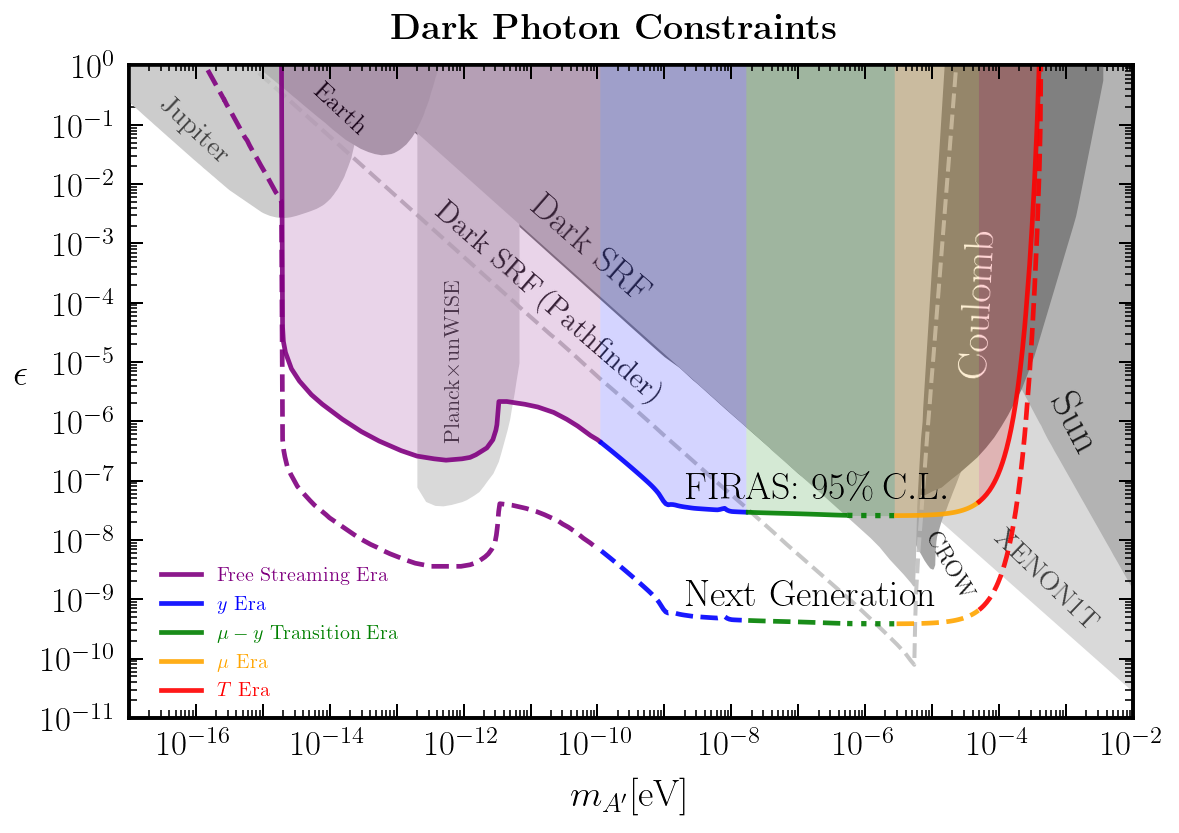

In [10]:

# ====================================================
# Plot Parameters
mAp_pltmin = 1e-17 # eV
mAp_pltmax = 1e-2  # eV

eps_pltmin = 1e-11
eps_pltmax = 1e0

majortick_len = 7 # length of major tick
minortick_len = 4 # length of minor tick

twin_majortick_len = majortick_len  # length of twin major tick
twin_minortick_len = minortick_len  # length of twin minor tick

# ====================================================
# color for different eras
color_free = 'purple'
color_y    = 'blue'
color_trans= 'green'
color_mu   = 'orange'
color_T    = 'red'
# ====================================================



fig, ax = plt.subplots()

ax1 = ax.twiny()

fig.set_size_inches(9, 6)

ax.set_xscale('log')
ax.set_yscale('log')
ax1.set_xscale('log')    # twin_y axis
ax1.set_yscale('log')    # twin_y axis


ax.set_xlim(mAp_pltmin, mAp_pltmax)
ax.set_ylim(eps_pltmin, eps_pltmax)
ax1.set_xlim(mAp_pltmin, mAp_pltmax)    # twin_y axis
ax1.set_ylim(eps_pltmin, eps_pltmax)    # twin_y axis



color_XenonSolar        = lighten_color('gray', 0.3)
color_SolarLuminosity   = lighten_color('gray', 0.6)
color_Cavendish         = lighten_color('gray', 1)
color_CROW              = lighten_color('gray', 0.7)
color_DarkSRF           = lighten_color('gray', 0.5)
color_Jupiter           = lighten_color('gray', 0.4)
color_Earth             = lighten_color('gray', 0.6)
color_CMBAnis_Huang     = lighten_color('gray', 0.3)


color_XenonSolar_label        = lighten_color('gray', 1.5)
color_SolarLuminosity_label   = lighten_color('black', 0.9)
color_Cavendish_label         = lighten_color('white', 1)
color_CROW_label              = lighten_color('gray', 1.8)
color_DarkSRF_label           = lighten_color('gray', 1.7)
color_Jupiter_label           = lighten_color('gray', 1.5)
color_Earth_label             = lighten_color('gray', 2)
color_CMBAnis_Huang_label     = lighten_color('gray', 1.5)


# Xenon-1T Solar (2112.12116 XENON1T Solar DP)
ax.fill_between(  XenonSolar_2Dary [0], XenonSolar_2Dary [1], max(XenonSolar_2Dary [1]), color=color_XenonSolar, alpha=1, zorder=0)

# Solar Luminosity (2304.12907 Li&Xu)
ax.fill_between(  SolarLuminosity_2Dary [0], SolarLuminosity_2Dary [1], max(SolarLuminosity_2Dary [1]), color=color_SolarLuminosity, alpha=1, zorder=1)

# Cavendish-Coulomb
ax.fill_between(  Cavendish_2Dary[0], Cavendish_2Dary[1], max(Cavendish_2Dary[1]), color=color_Cavendish, alpha=1, zorder=3)

# CROWS
ax.fill_between(  CROWS_2Dary[0], CROWS_2Dary[1], max(CROWS_2Dary[1]), color=color_CROW, alpha=1)

# Dark SRF Exclusion (2301.11512 Romanenko etc)
ax.fill_between(  DarkSRF_2Dary[0], DarkSRF_2Dary[1],max(DarkSRF_2Dary[1]),color=color_DarkSRF, alpha=1, zorder=5)

# Dark SRF Pathfinder Projection (2203.12714 Snowmass)
ax.plot(          DarkSRF23_Pathfinder_Proj_2Dary[0], DarkSRF23_Pathfinder_Proj_2Dary[1], color=color_DarkSRF, linestyle = 'dashed', linewidth=2.0, zorder=9)

# Jupiter
ax.fill_between(  Jupiter_2Dary[0], Jupiter_2Dary[1], max(Jupiter_2Dary[1]), color=color_Jupiter, alpha=1, zorder=5)

# Earth
ax.fill_between(  Earth_2Dary[0]  , Earth_2Dary[1]  , max(Earth_2Dary[1])  , color=color_Earth  , alpha=1, zorder=7)


# CMB Anisotropy (Huang et.al.)
ax.fill_between(  CMBAnis_Huang_2Dary[0]  , CMBAnis_Huang_2Dary[1]  , max(CMBAnis_Huang_2Dary[1])  , color=color_CMBAnis_Huang  , alpha=1, zorder=3)

# ======================================================================================
# COBE-FIRAS Plot Arrays: mAp and eps



# free streaming era
mAp_FIRAS_ary_free          = mAp_trans_fidu_[mAp_trans_fidu_<=mAp_trans_0]
eps_FIRAS_ary_free          = eps_trans_fidu_[mAp_trans_fidu_<=mAp_trans_0]

# y era
mAp_FIRAS_ary_y             = mAp_trans_fidu_[np.logical_and(mAp_trans_fidu_>mAp_trans_0,mAp_trans_fidu_<=mAp_trans_1)]
eps_FIRAS_ary_y             = eps_trans_fidu_[np.logical_and(mAp_trans_fidu_>mAp_trans_0,mAp_trans_fidu_<mAp_trans_1)]

# transition era (solid)
mAp_FIRAS_ary_trans_solid   = mAp_trans_fidu_[np.logical_and(mAp_trans_fidu_>mAp_trans_1,mAp_trans_fidu_<=mAp_trans_2)]
eps_FIRAS_ary_trans_solid   = eps_trans_fidu_[np.logical_and(mAp_trans_fidu_>mAp_trans_1,mAp_trans_fidu_<mAp_trans_2)]

# transition era (dotted)
mAp_FIRAS_ary_trans_dotted  = mAp_trans_fidu_M
eps_FIRAS_ary_trans_dotted  = eps_trans_fidu_M

# transition era (total)
mAp_FIRAS_ary_trans         = np.append(mAp_FIRAS_ary_trans_solid,mAp_FIRAS_ary_trans_dotted)
eps_FIRAS_ary_trans         = np.append(eps_FIRAS_ary_trans_solid,eps_FIRAS_ary_trans_dotted)

# mu era
mAp_FIRAS_ary_mu            = mAp_trans_fidu_R[np.logical_and(mAp_trans_fidu_R>=mAp_max_dashed,mAp_trans_fidu_R<mAp_dcs)]
eps_FIRAS_ary_mu            = eps_trans_fidu_R[np.logical_and(mAp_trans_fidu_R>=mAp_max_dashed,mAp_trans_fidu_R<mAp_dcs)]

# T era
mAp_FIRAS_ary_T             = mAp_trans_fidu_R[mAp_trans_fidu_R>=mAp_dcs]
eps_FIRAS_ary_T             = eps_trans_fidu_R[mAp_trans_fidu_R>=mAp_dcs]
# ======================================================================================
# PIXIE Plot Arrays: mAp and eps
# next generation experiments
PIXIE_rescale = 1.5e-2

# Caputo et al (2002.05165 PIXIE) projection inhomogeneous  

mAp_20_PIXIE_inho_ = Caputo_20_PIXIE_inho_2Dary[0]
eps_20_PIXIE_inho_ = Caputo_20_PIXIE_inho_2Dary[1]

# free streaming era
mAp_PIXIE_ary_free          = mAp_20_PIXIE_inho_[mAp_20_PIXIE_inho_<=mAp_trans_0]
eps_PIXIE_ary_free          = eps_20_PIXIE_inho_[mAp_20_PIXIE_inho_<=mAp_trans_0]

# y era
mAp_PIXIE_ary_y             = mAp_trans_fidu_[np.logical_and(mAp_trans_fidu_>mAp_trans_0,mAp_trans_fidu_<=mAp_trans_1)]
eps_PIXIE_ary_y             = PIXIE_rescale * eps_trans_fidu_[np.logical_and(mAp_trans_fidu_>mAp_trans_0,mAp_trans_fidu_<mAp_trans_1)]

# transition era (solid)
mAp_PIXIE_ary_tran_solid    = mAp_trans_fidu_[np.logical_and(mAp_trans_fidu_>mAp_trans_1,mAp_trans_fidu_<=mAp_trans_2)]
eps_PIXIE_ary_tran_solid    = PIXIE_rescale * eps_trans_fidu_[np.logical_and(mAp_trans_fidu_>mAp_trans_1,mAp_trans_fidu_<mAp_trans_2)]

# transition era (dotted)
mAp_PIXIE_ary_tran_dotted   = mAp_trans_fidu_M
eps_PIXIE_ary_tran_dotted   = PIXIE_rescale * eps_trans_fidu_M

# transition era (total)
mAp_PIXIE_ary_tran          = np.append(mAp_PIXIE_ary_tran_solid,mAp_PIXIE_ary_tran_dotted)
eps_PIXIE_ary_tran          = np.append(eps_PIXIE_ary_tran_solid,eps_PIXIE_ary_tran_dotted)

# mu era
mAp_PIXIE_ary_mu            = mAp_trans_fidu_R[np.logical_and(mAp_trans_fidu_R>=mAp_max_dashed,mAp_trans_fidu_R<mAp_dcs)]
eps_PIXIE_ary_mu            = PIXIE_rescale * eps_trans_fidu_R[np.logical_and(mAp_trans_fidu_R>=mAp_max_dashed,mAp_trans_fidu_R<mAp_dcs)]

# T era
mAp_PIXIE_ary_T             = mAp_trans_fidu_R[mAp_trans_fidu_R>=mAp_dcs]
eps_PIXIE_ary_T             = PIXIE_rescale * eps_trans_fidu_R[mAp_trans_fidu_R>=mAp_dcs]
# ======================================================================================

# COBE-FIRAS constraint: Line
linewidth_FIRAS_solid  = 2.35
linewidth_FIRAS_dotted = 2.65

ax.plot( mAp_FIRAS_ary_free        , eps_FIRAS_ary_free         , color=color_free ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'Free Streaming Era' )
ax.plot( mAp_FIRAS_ary_y           , eps_FIRAS_ary_y            , color=color_y    ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$y$ Era'            )
ax.plot( mAp_FIRAS_ary_trans_solid , eps_FIRAS_ary_trans_solid  , color=color_trans,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$\mu-y$ Transition Era'     )
ax.plot( mAp_FIRAS_ary_trans_dotted, eps_FIRAS_ary_trans_dotted , color=color_trans,  linewidth=linewidth_FIRAS_dotted   , zorder=10,       linestyle = 'dotted')
ax.plot( mAp_FIRAS_ary_mu          , eps_FIRAS_ary_mu           , color=color_mu   ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$\mu$ Era'          )
ax.plot( mAp_FIRAS_ary_T           , eps_FIRAS_ary_T            , color=color_T    ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$T$ Era'            )

# COBE-FIRAS constraint: Shade
alpha_FIRAS = 0.17

ax.fill_between(  mAp_FIRAS_ary_free                                      , eps_FIRAS_ary_free                                      , max(np.ones(len(mAp_FIRAS_ary_free)))         ,linewidth=0.0 , color=color_free  , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_free[-1], mAp_FIRAS_ary_y    )  , np.append(eps_FIRAS_ary_free[-1], eps_FIRAS_ary_y    )  , max(np.ones(len(mAp_FIRAS_ary_y)+1))          ,linewidth=0.0 , color=color_y     , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_y[-1] , mAp_FIRAS_ary_trans)    , np.append(eps_FIRAS_ary_y[-1]   , eps_FIRAS_ary_trans)  , max(np.ones(len(mAp_FIRAS_ary_trans)+1))      ,linewidth=0.0 , color=color_trans , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_trans[-1], mAp_FIRAS_ary_mu)    , np.append(eps_FIRAS_ary_trans[-1], eps_FIRAS_ary_mu)    , max(np.ones(len(mAp_FIRAS_ary_mu)+1))         ,linewidth=0.0 , color=color_mu    , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_mu[-1], mAp_FIRAS_ary_T)        , np.append(eps_FIRAS_ary_mu[-1], eps_FIRAS_ary_T)        , max(np.ones(len(mAp_FIRAS_ary_T)+1))          ,linewidth=0.0 , color=color_T     , alpha=alpha_FIRAS, zorder=10)


# PIXIE projection: Line
# linewidth_PIXIE = 2.3
linewidth_PIXIE_dashed = 2.35
linewidth_PIXIE_dotted = 2.65

ax.plot( mAp_PIXIE_ary_free        , eps_PIXIE_ary_free        , color=color_free  , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_y           , eps_PIXIE_ary_y           , color=color_y     , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_tran_solid  , eps_PIXIE_ary_tran_solid  , color=color_trans , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_tran_dotted , eps_PIXIE_ary_tran_dotted , color=color_trans , linestyle='dotted' , linewidth=linewidth_PIXIE_dotted , zorder=10)
ax.plot( mAp_PIXIE_ary_mu          , eps_PIXIE_ary_mu          , color=color_mu    , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)
ax.plot( mAp_PIXIE_ary_T           , eps_PIXIE_ary_T           , color=color_T     , linestyle='dashed' , linewidth=linewidth_PIXIE_dashed , zorder=10)


ax.text(7e-5    , 3e-10  , r'XENON1T'                , fontsize=14 , color=color_XenonSolar_label      , rotation=-44 , zorder=9)
ax.text(4.5e-4  , 3e-7   , r'Sun'                    , fontsize=21 , color=color_SolarLuminosity_label , rotation=-62 , zorder=9)
ax.text(2.3e-5  , 7e-6   , r'Coulomb'                , fontsize=21 , color=color_Cavendish_label       , rotation=87  , zorder=9)
ax.text(7e-6    , 1e-9   , r'CROW'                   , fontsize=12 , color=color_CROW_label            , rotation=-60 , zorder=9)
ax.text(8e-12   , 1e-4   , r'Dark SRF'               , fontsize=18 , color=color_DarkSRF_label         , rotation=-41 , zorder=9)
ax.text(3e-13   , 2e-6   , r'Dark SRF\,(Pathfinder)' , fontsize=15 , color=color_DarkSRF_label         , rotation=-41 , zorder=9)
ax.text(2.5e-17 , 2.3e-2 , r'Jupiter'                , fontsize=14 , color=color_Jupiter_label         , rotation=-43 , zorder=9)
ax.text(5e-15   , 7e-2   , r'Earth'                  , fontsize=13 , color=color_Earth_label           , rotation=-43 , zorder=9)
ax.text(5e-13 , 5e-7   , r'Planck$\times$unWISE'   , fontsize=11 , color=color_CMBAnis_Huang_label    , rotation=90 , zorder=9)

# ======================================================================================
# Label of 'FIRAS'
fontsize_FIRAS = 19

ax.text(2e-9, 5e-8, "FIRAS: $95\%\,\mathrm{C.L.}$", color='black', zorder=10, fontsize=fontsize_FIRAS, fontweight='bold')
# ======================================================================================
# Label of next generation experiment
fontsize_next_generation = fontsize_FIRAS

ax.text(2e-9, 8e-10, "Next Generation", color='black', zorder=10, fontsize=fontsize_next_generation, fontweight='bold')
# ======================================================================================



ax.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=100) )
ax.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))
ax.yaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.yaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))


ax.tick_params(which='major', length=majortick_len, labelbottom=True)
ax.tick_params(which='minor', length=minortick_len, labelbottom=False)

ax.tick_params(axis='both', left=True, top=True, right=True, bottom=True, labelleft=True, labeltop=False, labelright=False, labelbottom=True)

plt.setp(ax.xaxis.get_ticklabels(), rotation=0)

ax.set_xlabel(r'$m_{A^\prime}$[eV]',fontsize=19)
ax.set_ylabel(r'$\epsilon$',fontsize=19, rotation=0)

ax1.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax1.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)) )

ax1.tick_params(which='major', length=twin_majortick_len)
ax1.tick_params(axis='both'  , left=False, top=True, right=False, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)


color_Era_ary = [color_free, color_y, color_trans, color_mu, color_T]

leg = ax.legend(ncol=1, loc='center', bbox_to_anchor=(0.15, 0.13), fontsize=10)

for color,text in zip(color_Era_ary,leg.get_texts()):
    text.set_color(color)

fig.suptitle(r"\bf{Dark Photon Constraints}", y=0.94, fontsize=18)

plt.savefig('../plots/mAp_eps_plt_allbounds.png', dpi=350)


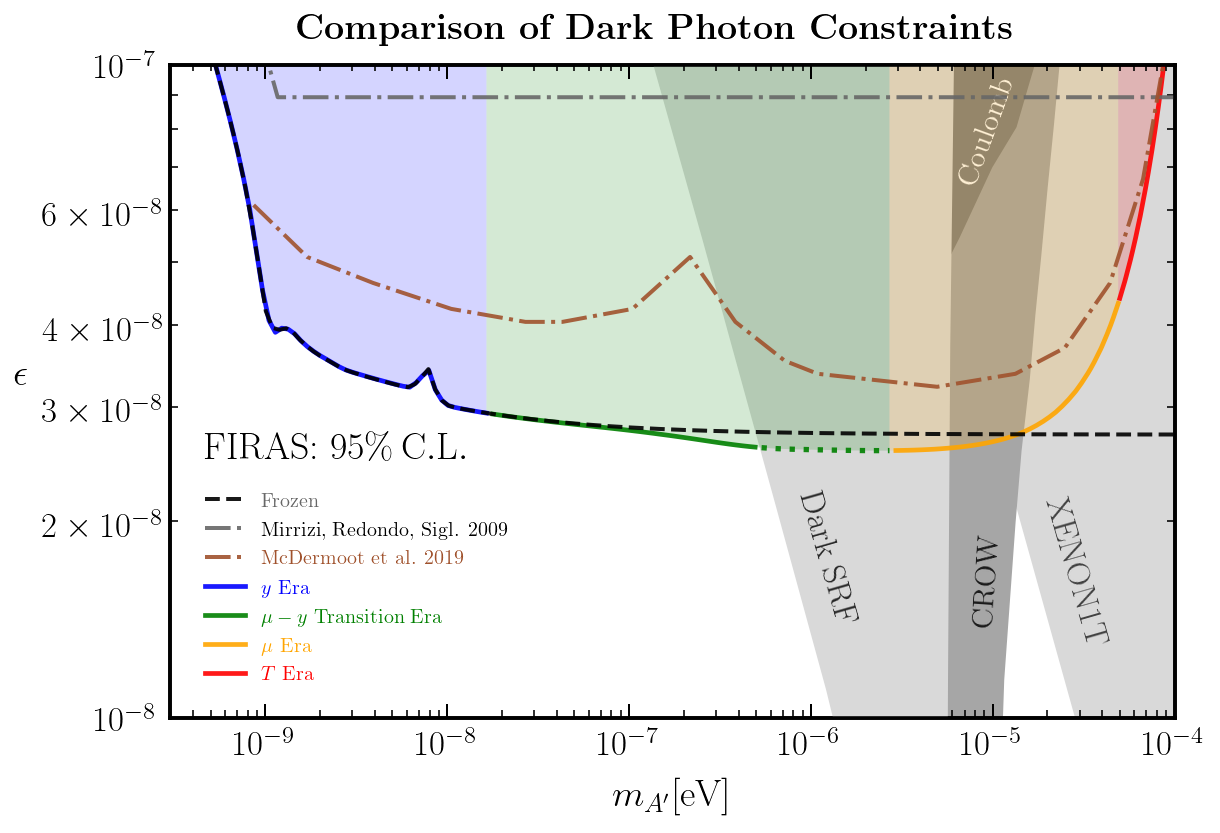

In [11]:
# ====================================================
# Plot Parameters
mAp_pltmin = 3e-10 # eV
mAp_pltmax = 1e-4  # eV

eps_pltmin = 1e-8
eps_pltmax = 1e-7

majortick_len = 7 # length of major tick
minortick_len = 4 # length of minor tick

twin_majortick_len = majortick_len  # length of twin major tick
twin_minortick_len = minortick_len  # length of twin minor tick
# ====================================================
set_matplotlib_formats('retina')

fig, ax = plt.subplots()

ax1 = ax.twiny()

fig.set_size_inches(9, 6)

ax.set_xscale('log')
ax.set_yscale('log')
ax1.set_xscale('log')    # twin_y axis
ax1.set_yscale('log')    # twin_y axis


ax.set_xlim(mAp_pltmin, mAp_pltmax)
ax.set_ylim(eps_pltmin, eps_pltmax)
ax1.set_xlim(mAp_pltmin, mAp_pltmax)    # twin_y axis
ax1.set_ylim(eps_pltmin, eps_pltmax)    # twin_y axis


color_XenonSolar_label       = lighten_color('gray', 1.5)
color_SolarLuminosity_label  = lighten_color('black', 0.9)
color_Cavendish_label        = lighten_color('white', 1)
color_CROW_label             = lighten_color('gray', 1.8)
color_DarkSRF_label          = lighten_color('gray', 1.7)
color_Jupiter_label          = lighten_color('gray', 1.5)
color_Earth_label            = lighten_color('gray', 2)

color_XenonSolar       = lighten_color('gray', 0.3)
color_SolarLuminosity  = lighten_color('gray', 0.6)
color_Cavendish        = lighten_color('gray', 1)
color_CROW             = lighten_color('gray', 0.7)
color_DarkSRF          = lighten_color('gray', 0.3)
color_Jupiter          = lighten_color('gray', 0.4)
color_Earth            = lighten_color('gray', 0.6)

color_freestream_calc='black'
color_pure_energy_injection='sienna'
color_McDermott_Witte_19_FIRAS='sienna'
color_Mirizzi_09=lighten_color('gray', 1.2)

#Xenon-1T Solar (2112.12116 XENON1T Solar DP)
ax.fill_between(  XenonSolar_2Dary [0], XenonSolar_2Dary [1], max(XenonSolar_2Dary [1]), color=color_XenonSolar, alpha=1, zorder=0)


# Cavendish-Coulomb

#without interpolation, raw data
ax.fill_between(  Cavendish_2Dary[0], Cavendish_2Dary[1], max(Cavendish_2Dary[1]), color=color_Cavendish, alpha=1, zorder=2)


#CROWS
ax.fill_between(  CROWS_2Dary[0], CROWS_2Dary[1], max(CROWS_2Dary[1]), color=color_CROW, alpha=1, zorder=1)


#Dark SRF PathFinder (2301.11512 Romanenko etc)
ax.fill_between(  DarkSRF_2Dary[0], DarkSRF_2Dary[1], max(DarkSRF_2Dary[1]), color=color_DarkSRF, alpha=1, zorder=3)


#ax.plot( mAp_FIRAS_ho , eps_FIRAS_ho, label = r'Homogeneous', color = 'red', linestyle = 'dashed', linewidth=2.0, zorder=11)

# free-streaming
mAp_cuttoff=m_Aprime_res_RAD(z_dcs)
ax.plot( frozen_FIRAS_2Dary[0] , frozen_FIRAS_2Dary[1], label = r'Frozen', color = color_freestream_calc, linestyle = 'dashed', linewidth=2.0, zorder=11)


# Mirizzi et al (0901.0014)
ax.plot( Mirizzi_09_FIRAS_extended_2Dary[0], Mirizzi_09_FIRAS_extended_2Dary[1], label = r'Mirrizi, Redondo, Sigl. 2009', color = color_Mirizzi_09, linestyle = 'dashdot', linewidth=2, zorder=11)


# #pure energy injection
# ax.plot( pure_energy_injection_2Dary[0]     , pure_energy_injection_2Dary[1], linewidth=2, label = r'Pure Energy Injection', color = color_pure_energy_injection, linestyle = 'dashed', zorder=12)

# COBE-FIRAS, McDermott et al (1911.05086)
ax.plot( McDermott_Witte_19_FIRAS_2Dary[0]     , McDermott_Witte_19_FIRAS_2Dary[1], linewidth=2, label = r'McDermoot et al. 2019 ', color = color_McDermott_Witte_19_FIRAS, linestyle = 'dashdot', zorder=12)





# COBE-FIRAS constraint: Line
linewidth_FIRAS_solid  = 2.35
linewidth_FIRAS_dotted = 2.65



#ax.plot( mAp_FIRAS_ary_free        , eps_FIRAS_ary_free         , color=color_free ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'Free Streaming Era' )
ax.plot( mAp_FIRAS_ary_y           , eps_FIRAS_ary_y            , color=color_y    ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$y$ Era'            )
ax.plot( mAp_FIRAS_ary_trans_solid , eps_FIRAS_ary_trans_solid  , color=color_trans,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$\mu-y$ Transition Era'     )
ax.plot( mAp_FIRAS_ary_trans_dotted, eps_FIRAS_ary_trans_dotted , color=color_trans,  linewidth=linewidth_FIRAS_dotted   , zorder=10,       linestyle = 'dotted')
ax.plot( mAp_FIRAS_ary_mu          , eps_FIRAS_ary_mu           , color=color_mu   ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$\mu$ Era'          )
ax.plot( mAp_FIRAS_ary_T           , eps_FIRAS_ary_T            , color=color_T    ,  linewidth=linewidth_FIRAS_solid    , zorder=10, label = r'$T$ Era'            )

# COBE-FIRAS constraint: Shade
alpha_FIRAS = 0.17

ax.fill_between(  np.append(mAp_FIRAS_ary_free[-1], mAp_FIRAS_ary_y    )  , np.append(eps_FIRAS_ary_free[-1], eps_FIRAS_ary_y    )  , max(np.ones(len(mAp_FIRAS_ary_y)+1))          ,linewidth=0.0 , color=color_y     , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_y[-1] , mAp_FIRAS_ary_trans)    , np.append(eps_FIRAS_ary_y[-1]   , eps_FIRAS_ary_trans)  , max(np.ones(len(mAp_FIRAS_ary_trans)+1))      ,linewidth=0.0 , color=color_trans , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_trans[-1], mAp_FIRAS_ary_mu)    , np.append(eps_FIRAS_ary_trans[-1], eps_FIRAS_ary_mu)    , max(np.ones(len(mAp_FIRAS_ary_mu)+1))         ,linewidth=0.0 , color=color_mu    , alpha=alpha_FIRAS, zorder=10)
ax.fill_between(  np.append(mAp_FIRAS_ary_mu[-1], mAp_FIRAS_ary_T)        , np.append(eps_FIRAS_ary_mu[-1], eps_FIRAS_ary_T)        , max(np.ones(len(mAp_FIRAS_ary_T)+1))          ,linewidth=0.0 , color=color_T     , alpha=alpha_FIRAS, zorder=10)





ax.text(1.8e-5 , 1.3e-8, r'XENON1T'          ,  fontweight='bold', fontsize=17, color=color_XenonSolar_label      , rotation=-74, zorder=9)
ax.text(6.24e-6 , 6.6e-8 , r'Coulomb',  fontweight='bold', fontsize=15, color=color_Cavendish_label       , rotation=70, zorder=9)
ax.text(7.6e-6 , 1.4e-8 , r'CROW'             ,  fontweight='bold', fontsize=15, color=color_CROW_label            , rotation=86, zorder=9)
ax.text(8e-7 , 1.4e-8, r'Dark SRF'          ,  fontweight='bold', fontsize=17, color=color_DarkSRF_label         , rotation=-74, zorder=9)




ax.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))
ax.yaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax.yaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))


ax.tick_params(which='major', length=majortick_len, labelbottom=True)
ax.tick_params(which='minor', length=minortick_len, labelbottom=False)

ax.tick_params(axis='both', left=True, top=True, right=True, bottom=True, labelleft=True, labeltop=False, labelright=False, labelbottom=True)

plt.setp(ax.xaxis.get_ticklabels(), rotation=0)

ax.set_xlabel(r'$m_{A^\prime}$[eV]',fontsize=19)
ax.set_ylabel(r'$\epsilon$',fontsize=19, rotation=0)

ax1.xaxis.set_major_locator( mticker.LogLocator(numticks=999, base=10) )
ax1.xaxis.set_minor_locator( mticker.LogLocator(numticks=999, base=10,subs=(.1, .2, .3, .4, .5, .6, .7, .8, .9)))

ax1.tick_params(which='major', length=twin_majortick_len)
ax1.tick_params(axis='both', left=False, top=True, right=False, bottom=True, labelleft=False, labeltop=False, labelright=False, labelbottom=False)


ax.text(4.58e-10, 2.5e-8, "FIRAS: $95\%\,\mathrm{C.L.}$", fontsize=fontsize_FIRAS, color='black', zorder=9,  fontweight='bold')




    
ax.legend(bbox_to_anchor=(0.18, 0.195), loc = 'center',fontsize=10.0)

color_Era_ary = [color_Mirizzi_09,color_freestream_calc,color_McDermott_Witte_19_FIRAS, color_y, color_trans, color_mu, color_T]
leg = ax.legend(ncol=1, loc='center', bbox_to_anchor=(0.185, 0.2), fontsize=10)
for color,text in zip(color_Era_ary,leg.get_texts()):
    text.set_color(color)


fig.suptitle(r"\bf{Comparison of Dark Photon Constraints}", y=0.94, fontsize=18)


plt.savefig('../plots/mAp_eps_plt_zoomin.pdf', dpi=500)